In [1]:
import pandas as pd
import matplotlib
%matplotlib inline 
import numpy as np

In [2]:
### Data transformation from previous notebooks
nyc = pd.read_csv('data/central-park-raw.csv', parse_dates=[0])
nyc.columns = [x.strip() for x in nyc.columns]
nyc.columns = [x.replace(' ', '_') for x in nyc.columns]
nyc.PrecipitationIn.replace("T", '0.001')
nyc.PrecipitationIn = pd.to_numeric(nyc.PrecipitationIn.replace("T", '0.001'))
nyc['Events'] = nyc.Events.fillna('')

In [3]:
elnino = pd.read_csv(
    'data/tao-all2.dat.gz',
    sep=' ',
    na_values=['.'],
    names=['id', 'year', 'month', 'day', 'date', 'latitude', 'longitude', 'zonal winds', 'merid winds', 'rel humid', 'air temp', 'surface temp'],
    parse_dates=[4]
)
elnino.columns = [x.replace(' ', '_') for x in elnino.columns]

# Grouping

Pandas allows us to perform aggregates calculations over grouped portions of ``Series`` or ``DataFrames``. The ``.groupby`` method is the low level workhorse that enables this.

In [4]:
# We can group by a column, but if it has unique values it isn't useful
nyc.groupby('EST').mean()['CloudCover']

EST
2006-01-01    8.0
2006-01-02    5.0
2006-01-03    8.0
2006-01-04    3.0
2006-01-05    6.0
2006-01-06    7.0
2006-01-07    2.0
2006-01-08    3.0
2006-01-09    1.0
2006-01-10    1.0
2006-01-11    7.0
2006-01-12    0.0
2006-01-13    5.0
2006-01-14    8.0
2006-01-15    5.0
2006-01-16    0.0
2006-01-17    5.0
2006-01-18    7.0
2006-01-19    0.0
2006-01-20    0.0
2006-01-21    2.0
2006-01-22    1.0
2006-01-23    7.0
2006-01-24    1.0
2006-01-25    4.0
2006-01-26    1.0
2006-01-27    0.0
2006-01-28    0.0
2006-01-29    5.0
2006-01-30    4.0
             ... 
2014-12-02    7.0
2014-12-03    7.0
2014-12-04    0.0
2014-12-05    6.0
2014-12-06    8.0
2014-12-07    1.0
2014-12-08    6.0
2014-12-09    8.0
2014-12-10    8.0
2014-12-11    7.0
2014-12-12    6.0
2014-12-13    2.0
2014-12-14    4.0
2014-12-15    0.0
2014-12-16    7.0
2014-12-17    7.0
2014-12-18    6.0
2014-12-19    5.0
2014-12-20    8.0
2014-12-21    8.0
2014-12-22    8.0
2014-12-23    8.0
2014-12-24    8.0
2014-12-25    5.0
2014-1

In [5]:
# Let's get the average cloud cover each month
nyc.groupby(nyc.EST.dt.month).mean()['CloudCover']

EST
1     3.583643
2     3.397638
3     3.530466
4     3.381481
5     3.301075
6     3.088889
7     2.268817
8     2.573477
9     2.811111
10    3.462366
11    3.411111
12    3.989247
Name: CloudCover, dtype: float64

In [6]:
# The previous aggregated over every month, 
# what if we want to group by year and month?
nyc.groupby([nyc.EST.dt.year, nyc.EST.dt.month]).mean()['CloudCover']

EST   EST
2006  1      3.677419
      2      3.035714
      3      2.483871
      4      2.600000
      5      3.161290
      6      3.800000
      7      1.580645
      8      2.548387
      9      3.166667
      10     3.387097
      11     4.133333
      12     3.064516
2007  1      4.096774
      2      2.785714
      3      3.258065
      4      4.700000
      5      1.903226
      6      2.500000
      7      2.161290
      8      2.774194
      9      1.600000
      10     3.548387
      11     3.633333
      12     4.709677
2008  1      3.161290
      2      4.310345
      3      3.677419
      4      3.800000
      5      3.322581
      6      2.366667
               ...   
2012  7      2.677419
      8      2.129032
      9      3.266667
      10     4.096774
      11     2.666667
      12     4.580645
2013  1      3.516129
      2      4.392857
      3      4.290323
      4      2.833333
      5      3.193548
      6      2.933333
      7      3.096774
      8      2.935484


In [7]:
# The previous aggregated over every month, 
# what if we want to group by year and month?
nyc.groupby([nyc.EST.dt.year.rename('year'), nyc.EST.dt.month]).mean()['CloudCover']

year  EST
2006  1      3.677419
      2      3.035714
      3      2.483871
      4      2.600000
      5      3.161290
      6      3.800000
      7      1.580645
      8      2.548387
      9      3.166667
      10     3.387097
      11     4.133333
      12     3.064516
2007  1      4.096774
      2      2.785714
      3      3.258065
      4      4.700000
      5      1.903226
      6      2.500000
      7      2.161290
      8      2.774194
      9      1.600000
      10     3.548387
      11     3.633333
      12     4.709677
2008  1      3.161290
      2      4.310345
      3      3.677419
      4      3.800000
      5      3.322581
      6      2.366667
               ...   
2012  7      2.677419
      8      2.129032
      9      3.266667
      10     4.096774
      11     2.666667
      12     4.580645
2013  1      3.516129
      2      4.392857
      3      4.290323
      4      2.833333
      5      3.193548
      6      2.933333
      7      3.096774
      8      2.935484


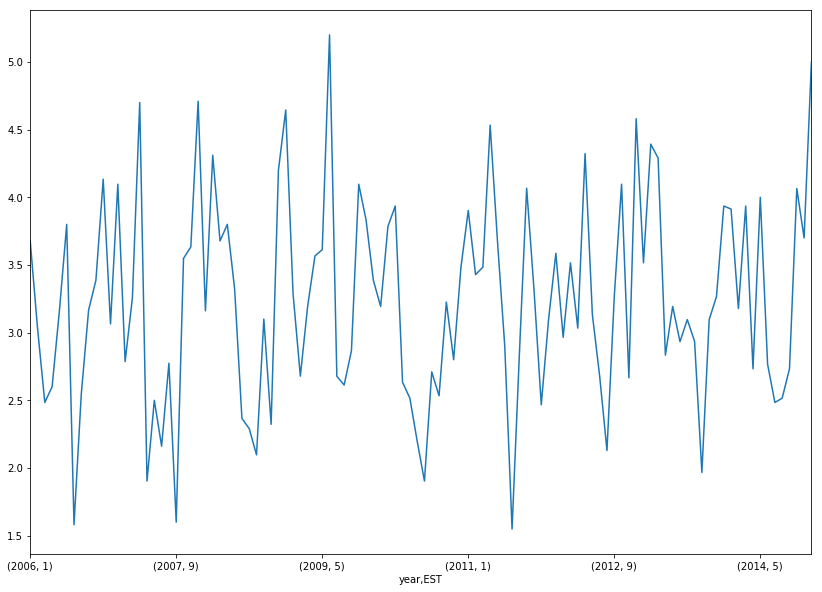

In [8]:
nyc.groupby([nyc.EST.dt.year.rename('year'), nyc.EST.dt.month]).mean(
)['CloudCover'].plot(figsize=(14,10))

In [10]:
# With the .agg method we can apply many functions
nyc.groupby([nyc.EST.dt.year.rename('year'), nyc.EST.dt.month]).agg(['mean', 'max', 'min'])

Max_TemperatureF              Mean_TemperatureF              \
                     mean    max   min              mean   max   min   
year EST                                                               
2006 1          47.548387   64.0  32.0         41.161290  53.0  24.0   
     2          42.321429   62.0  28.0         35.928571  54.0  23.0   
     3          50.129032   74.0  33.0         43.032258  61.0  28.0   
     4          64.866667   82.0  46.0         55.266667  70.0  40.0   
     5          71.387097   88.0  61.0         62.838710  78.0  55.0   
     6          77.233333   91.0  64.0         70.600000  81.0  60.0   
     7          84.935484   95.0  77.0         77.677419  86.0  68.0   
     8          82.838710   97.0  69.0         76.096774  90.0  66.0   
     9          73.066667   83.0  66.0         66.866667  75.0  58.0   
     10         63.290323   79.0  50.0         56.483871  71.0  44.0   
     11         57.400000   69.0  44.0         52.233333  64.0  41.0   
     12         49.516129   70.0  29.0         43.870968  60.0  24.0   
2007 1          43.580645   72.0  22.0         37.741935  63.0  16.0   
     2          34.500000   49.0  18.0         28.428571  44.0  13.0   
     3          50.935484   78.0  21.0         42.483871  64.0  16.0   
     4          57.933333   86.0  41.0         50.566667  72.0  36.0   
     5          75.290323   91.0  54.0         65.483871  78.0  51.0   
     6          79.566667   91.0  64.0         71.600000  82.0  60.0   
     7          82.322581   92.0  71.0         75.225806  84.0  66.0   
     8          81.419355   92.0  59.0         74.354839  84.0  58.0   
     9          78.000000   88.0  66.0         70.433333  80.0  58.0   
     10         70.548387   87.0  53.0         63.838710  77.0  46.0   
     11         51.566667   66.0  39.0         45.666667  58.0  33.0   
     12         41.580645   61.0  33.0         37.258065  51.0  27.0   
2008 1          42.419355   64.0  20.0         36.806452  59.0  16.0   
     2          43.137931   68.0  24.0         36.000000  55.0  17.0   
     3          50.290323   63.0  42.0         42.838710  54.0  36.0   
     4          63.533333   84.0  50.0         55.300000  71.0  42.0   
     5          68.935484   83.0  54.0         60.290323  72.0  50.0   
     6          82.566667   96.0  71.0         74.166667  86.0  64.0   
...                   ...    ...   ...               ...   ...   ...   
2012 7          87.258065  100.0  72.0         78.967742  87.0  67.0   
     8          84.161290   91.0  74.0         76.903226  83.0  68.0   
     9          75.866667   91.0  65.0         69.066667  83.0  60.0   
     10         63.709677   78.0  50.0         58.322581  70.0  46.0   
     11         49.700000   66.0  40.0         44.100000  57.0  36.0   
     12         46.322581   62.0  34.0         41.806452  55.0  31.0   
2013 1          40.838710   61.0  20.0         35.354839  49.0  16.0   
     2          39.357143   55.0  29.0         34.142857  46.0  24.0   
     3          46.290323   59.0  35.0         40.387097  50.0  32.0   
     4          61.300000   82.0  43.0         53.266667  67.0  38.0   
     5          71.193548   90.0  54.0         63.064516  83.0  50.0   
     6          80.300000   92.0  63.0         72.866667  83.0  61.0   
     7          86.322581   98.0  68.0         79.967742  90.0  66.0   
     8          81.548387   90.0  74.0         74.838710  81.0  68.0   
     9          76.333333   96.0  65.0         68.200000  87.0  58.0   
     10         66.903226   86.0  53.0         60.451613  76.0  47.0   
     11         52.100000   70.0  30.0         45.500000  65.0  27.0   
     12         44.451613   71.0  30.0         38.741935  66.0  25.0   
2014 1          35.225806   58.0  18.0         28.870968  48.0  12.0   
     2          37.500000   56.0  24.0         32.000000  49.0  17.0   
     3          45.516129   66.0  29.0         37.870968  56.0  21.0   
     4          61.233333   77.0  47.0         52

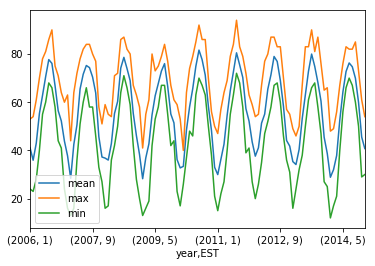

In [11]:
# Then plot
nyc.groupby([nyc.EST.dt.year.rename('year'), nyc.EST.dt.month]).agg(
    ['mean', 'max', 'min'])['Mean_TemperatureF'].plot()

In [16]:
# Or just look at a table for a column
nyc.groupby([nyc.EST.dt.year.rename('year'), nyc.EST.dt.month]).agg(
    ['mean', 'max', 'min'])['Max_TemperatureF']

mean    max   min
year EST                        
2006 1    47.548387   64.0  32.0
     2    42.321429   62.0  28.0
     3    50.129032   74.0  33.0
     4    64.866667   82.0  46.0
     5    71.387097   88.0  61.0
     6    77.233333   91.0  64.0
     7    84.935484   95.0  77.0
     8    82.838710   97.0  69.0
     9    73.066667   83.0  66.0
     10   63.290323   79.0  50.0
     11   57.400000   69.0  44.0
     12   49.516129   70.0  29.0
2007 1    43.580645   72.0  22.0
     2    34.500000   49.0  18.0
     3    50.935484   78.0  21.0
     4    57.933333   86.0  41.0
     5    75.290323   91.0  54.0
     6    79.566667   91.0  64.0
     7    82.322581   92.0  71.0
     8    81.419355   92.0  59.0
     9    78.000000   88.0  66.0
     10   70.548387   87.0  53.0
     11   51.566667   66.0  39.0
     12   41.580645   61.0  33.0
2008 1    42.419355   64.0  20.0
     2    43.137931   68.0  24.0
     3    50.290323   63.0  42.0
     4    63.533333   84.0  50.0
     5    68.935484   83.0  54.0
     6    82.566667   96.0  71.0
...             ...    ...   ...
2012 7    87.258065  100.0  72.0
     8    84.161290   91.0  74.0
     9    75.866667   91.0  65.0
     10   63.709677   78.0  50.0
     11   49.700000   66.0  40.0
     12   46.322581   62.0  34.0
2013 1    40.838710   61.0  20.0
     2    39.357143   55.0  29.0
     3    46.290323   59.0  35.0
     4    61.300000   82.0  43.0
     5    71.193548   90.0  54.0
     6    80.300000   92.0  63.0
     7    86.322581   98.0  68.0
     8    81.548387   90.0  74.0
     9    76.333333   96.0  65.0
     10   66.903226   86.0  53.0
     11   52.100000   70.0  30.0
     12   44.451613   71.0  30.0
2014 1    35.225806   58.0  18.0
     2    37.500000   56.0  24.0
     3    45.516129   66.0  29.0
     4    61.233333   77.0  47.0
     5    72.516129   86.0  59.0
     6    80.433333   89.0  70.0
     7    83.419355   91.0  74.0
     8    82.451613   90.0  73.0
     9    77.266667   92.0  64.0
     10   65.870968   77.0  53.0
     11   51.633333   69.0  36.0
     12   45.129032   65.0  32.0

[108 rows x 3 columns]

## Grouping Assignment
With the nino dataset:
* Find the mean temperature for each year
* Find the count of entries for each year
* Find the max temperature for each year

In [18]:
elnino.groupby([elnino.date.dt.year]).agg(['mean'])['air_temp']

,mean
date,
1980,22.774337
1981,22.454716
1982,24.640317
1983,25.320099
1984,23.810299
1985,24.913458
1986,26.217397
1987,27.098709
1988,25.203781


In [21]:
elnino.groupby([elnino.date.dt.year]).agg(['count'])['id']

,count
date,
1980,166
1981,545
1982,505
1983,406
1984,947
1985,1684
1986,3780
1987,4688
1988,6136


In [25]:
elnino.groupby([elnino.date.dt.year]).air_temp.count()

date
1980      166
1981      545
1982      505
1983      404
1984      903
1985     1420
1986     3158
1987     3989
1988     5329
1989     6293
1990     7104
1991     7722
1992    14653
1993    18366
1994    19597
1995    19848
1996    20330
1997    20304
1998     9207
Name: air_temp, dtype: int64

# Pivoting

In [27]:
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.mean, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF'])

mean               count_nonzero             
         Max_Dew_PointF Max_Humidity Max_Dew_PointF Max_Humidity
year EST                                                        
2006 1        35.387097    77.645161           31.0         31.0
     2        26.035714    68.750000           28.0         28.0
     3        28.774194    64.838710           31.0         31.0
     4        43.466667    75.100000           30.0         30.0
     5        52.258065    80.032258           31.0         31.0
     6        63.133333    84.966667           30.0         30.0
     7        69.483871    84.032258           31.0         31.0
     8        66.096774    80.322581           31.0         31.0
     9        59.533333    85.100000           30.0         30.0
     10       49.129032    79.451613           31.0         31.0
     11       45.333333    81.766667           30.0         30.0
     12       34.806452    68.516129           31.0         31.0
2007 1        32.806452    76.645161           30.0         31.0
     2        18.500000    67.571429           28.0         28.0
     3        33.096774    71.354839           31.0         31.0
     4        38.266667    74.300000           30.0         30.0
     5        52.677419    75.709677           31.0         31.0
     6        62.933333    82.633333           30.0         30.0
     7        65.838710    81.451613           31.0         31.0
     8        66.032258    83.774194           31.0         31.0
     9        60.833333    80.266667           30.0         30.0
     10       57.741935    84.806452           31.0         31.0
     11       39.333333    77.066667           30.0         30.0
     12       32.548387    82.387097           31.0         31.0
2008 1        28.516129    70.903226           31.0         31.0
     2        31.655172    78.758621           29.0         29.0
     3        32.967742    71.161290           31.0         31.0
     4        43.933333    74.266667           30.0         30.0
     5        49.612903    80.129032           31.0         31.0
     6        64.833333    85.033333           30.0         30.0
...                 ...          ...            ...          ...
2012 7        67.645161    82.032258           31.0         31.0
     8        67.645161    87.387097           31.0         31.0
     9        61.700000    86.066667           30.0         30.0
     10       53.548387    86.225806           31.0         31.0
     11       35.033333    74.900000           30.0         30.0
     12       37.967742    86.193548           31.0         31.0
2013 1        28.161290    76.387097           30.0         31.0
     2        28.000000    78.035714           28.0         28.0
     3        30.322581    75.580645           31.0         31.0
     4        41.500000    72.966667           30.0         30.0
     5        53.677419    82.677419           31.0         31.0
     6        64.166667    84.400000           30.0         30.0
     7        70.516129    83.709677           31.0         31.0
     8        65.161290    82.612903           31.0         31.0
     9        57.600000    78.033333           30.0         30.0
     10       50.709677    75.903226           31.0         31.0
     11       35.900000    68.000000           30.0         30.0
     12       32.935484    75.129032           31.0         31.0
2014 1        22.419355    74.387097           30.0         31.0
     2        24.000000    74.428571           28.0         28.0
     3        26.387097    63.032258           31.0         31.0
     4        40.933333    73.100000           30.0         30.0
     5        53.322581    76.354839           31.0         31.0
     6        62.166667    80.233333           30.0         30.0
     7        65.870968    80.451613           31.0         31.0
     8        62.548387    78.354839           31.0         31.0
     9        60.300000    78.666667           30.0         30.0
     10       51.935484    78.290323           31.0   

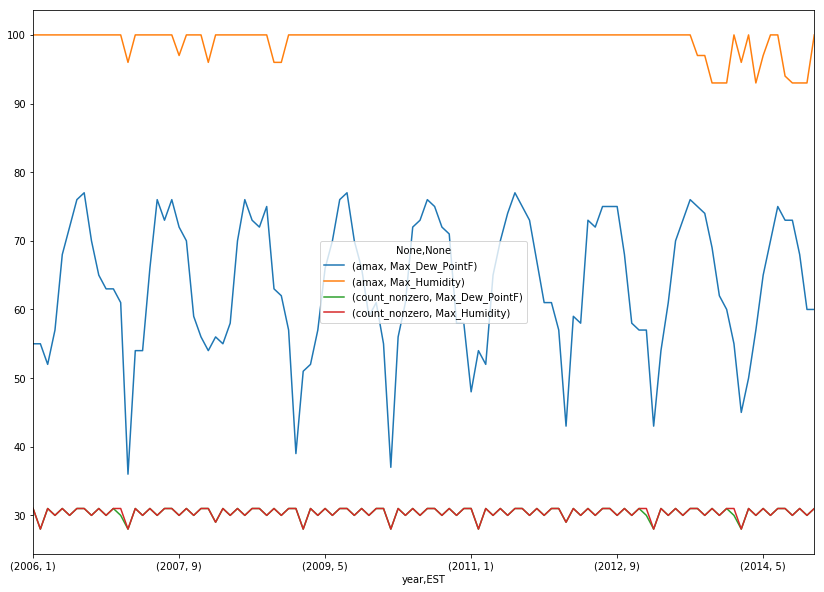

In [28]:
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF']).plot(figsize=(14,10))

In [29]:
# We can "unstack" to pull a left index into a column (0 is the left most index)
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF']).unstack(0)

amax                                                  \
     Max_Dew_PointF                                                   
year           2006  2007  2008  2009  2010  2011  2012  2013  2014   
EST                                                                   
1              55.0  61.0  54.0  39.0  55.0  48.0  57.0  57.0  55.0   
2              55.0  36.0  56.0  51.0  37.0  54.0  43.0  43.0  45.0   
3              52.0  54.0  55.0  52.0  56.0  52.0  59.0  54.0  50.0   
4              57.0  54.0  58.0  57.0  61.0  65.0  58.0  61.0  57.0   
5              68.0  66.0  70.0  66.0  72.0  70.0  73.0  70.0  65.0   
6              72.0  76.0  76.0  70.0  73.0  74.0  72.0  73.0  70.0   
7              76.0  73.0  73.0  76.0  76.0  77.0  75.0  76.0  75.0   
8              77.0  76.0  72.0  77.0  75.0  75.0  75.0  75.0  73.0   
9              70.0  72.0  75.0  70.0  72.0  73.0  75.0  74.0  73.0   
10             65.0  70.0  63.0  66.0  71.0  67.0  68.0  69.0  68.0   
11             63.0  59.0  62.0  59.0  58.0  61.0  58.0  62.0  60.0   
12             63.0  56.0  57.0  61.0  58.0  61.0  57.0  60.0  60.0   

                   ...  count_nonzero                                       \
     Max_Humidity  ... Max_Dew_PointF Max_Humidity                           
year         2006  ...           2014         2006  2007  2008  2009  2010   
EST                ...                                                       
1           100.0  ...           30.0         31.0  31.0  31.0  31.0  31.0   
2           100.0  ...           28.0         28.0  28.0  29.0  28.0  28.0   
3           100.0  ...           31.0         31.0  31.0  31.0  31.0  31.0   
4           100.0  ...           30.0         30.0  30.0  30.0  30.0  30.0   
5           100.0  ...           31.0         31.0  31.0  31.0  31.0  31.0   
6           100.0  ...           30.0         30.0  30.0  30.0  30.0  30.0   
7           100.0  ...           31.0         31.0  31.0  31.0  31.0  31.0   
8           100.0  ...           31.0         31.0  31.0  31.0  31.0  31.0   
9           100.0  ...           30.0         30.0  30.0  30.0  30.0  30.0   
10          100.0  ...           31.0         31.0  31.0  31.0  31.0  31.0   
11          100.0  ...           30.0         30.0  30.0  30.0  30.0  30.0   
12          100.0  ...           31.0         31.0  31.0  31.0  31.0  31.0   

                              
                              
year  2011  2012  2013  2014  
EST                           
1     31.0  31.0  31.0  31.0  
2     28.0  29.0  28.0  28.0  
3     31.0  31.0  31.0  31.0  
4     30.0  30.0  30.0  30.0  
5     31.0  31.0  31.0  31.0  
6     30.0  30.0  30.0  30.0  
7     31.0  31.0  31.0  31.0  
8     31.0  31.0  31.0  31.0  
9     30.0  30.0  30.0  30.0  
10    31.0  31.0  31.0  31.0  
11    30.0  30.0  30.0  30.0  
12    31.0  31.0  31.0  31.0  

[12 rows x 36 columns]

In [30]:
# We can "unstack" to pull a left index into a column (1 is the 2nd index)
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF']).unstack(1)

amax                                                        \
     Max_Dew_PointF                                                         
EST              1     2     3     4     5     6     7     8     9     10   
year                                                                        
2006           55.0  55.0  52.0  57.0  68.0  72.0  76.0  77.0  70.0  65.0   
2007           61.0  36.0  54.0  54.0  66.0  76.0  73.0  76.0  72.0  70.0   
2008           54.0  56.0  55.0  58.0  70.0  76.0  73.0  72.0  75.0  63.0   
2009           39.0  51.0  52.0  57.0  66.0  70.0  76.0  77.0  70.0  66.0   
2010           55.0  37.0  56.0  61.0  72.0  73.0  76.0  75.0  72.0  71.0   
2011           48.0  54.0  52.0  65.0  70.0  74.0  77.0  75.0  73.0  67.0   
2012           57.0  43.0  59.0  58.0  73.0  72.0  75.0  75.0  75.0  68.0   
2013           57.0  43.0  54.0  61.0  70.0  73.0  76.0  75.0  74.0  69.0   
2014           55.0  45.0  50.0  57.0  65.0  70.0  75.0  73.0  73.0  68.0   

      ... count_nonzero                                                        
      ...  Max_Humidity                                                        
EST   ...            3     4     5     6     7     8     9     10    11    12  
year  ...                                                                      
2006  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2007  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2008  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2009  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2010  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2011  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2012  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2013  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2014  ...          31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  

[9 rows x 48 columns]

In [31]:
# Just use one value and one aggregation
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.max],
               values=['Mean_TemperatureF']).unstack(1)

amax                                                        \
     Mean_TemperatureF                                                         
EST                 1     2     3     4     5     6     7     8     9     10   
year                                                                           
2006              53.0  54.0  61.0  70.0  78.0  81.0  86.0  90.0  75.0  71.0   
2007              63.0  44.0  64.0  72.0  78.0  82.0  84.0  84.0  80.0  77.0   
2008              59.0  55.0  54.0  71.0  72.0  86.0  87.0  82.0  80.0  67.0   
2009              41.0  55.0  61.0  80.0  73.0  75.0  79.0  84.0  77.0  67.0   
2010              53.0  40.0  64.0  74.0  79.0  85.0  92.0  86.0  86.0  70.0   
2011              47.0  57.0  64.0  69.0  79.0  84.0  94.0  83.0  79.0  72.0   
2012              54.0  55.0  67.0  77.0  80.0  87.0  87.0  83.0  83.0  70.0   
2013              49.0  46.0  50.0  67.0  83.0  83.0  90.0  81.0  87.0  76.0   
2014              48.0  49.0  56.0  67.0  76.0  83.0  82.0  82.0  85.0  73.0   

                  
                  
EST     11    12  
year              
2006  64.0  60.0  
2007  58.0  51.0  
2008  63.0  58.0  
2009  61.0  59.0  
2010  56.0  50.0  
2011  63.0  59.0  
2012  57.0  55.0  
2013  65.0  66.0  
2014  61.0  54.0

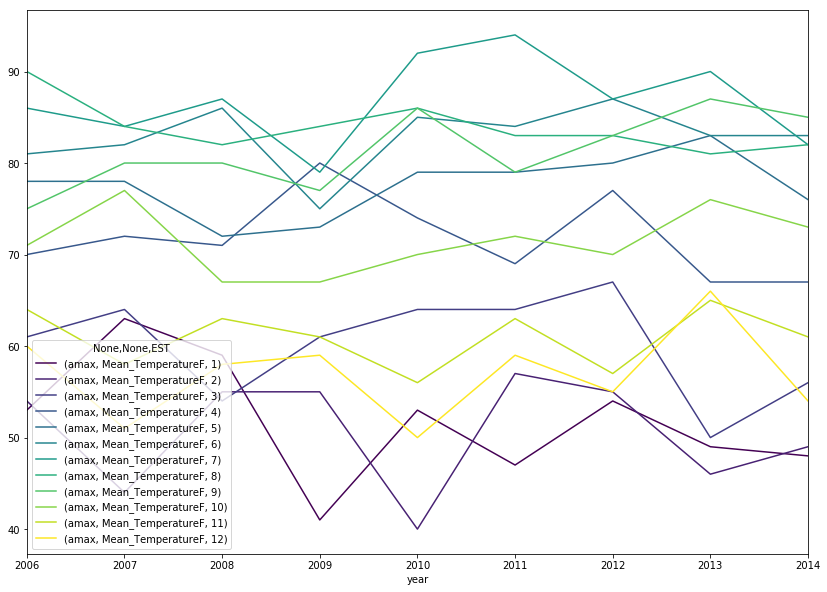

In [32]:
# Just use one value and one aggregation by year
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.max],
               values=['Mean_TemperatureF']).unstack(1).plot(cmap='viridis', figsize=(14,10))

In [ ]:
# Just use one value and one aggregation by month
nyc.pivot_table(index=[nyc.EST.dt.year.rename('year'), nyc.EST.dt.month], aggfunc=[np.max],
               values=['Mean_TemperatureF']).unstack(0).plot(cmap='viridis', figsize=(14,10))

## Pivoting Assignment
With the nino dataset:
* Pivot the nino data using the ``.pivot_table`` method. Group by year and month, the ``air_temp`` column. Reduce using the ``max``, ``min``, and ``np.mean`` functions. (You will either need to create a month column or use ``year_month_day.dt.month``)
* Plot a line plot of the previous pivot table

## Pivoting Bonus Assignment
* Using ``.groupby`` we can sometimes perform the same operation as pivot tables. Pivot the nino data using the ``.groupby`` method. Group by year and month, the ``air_temp_`` column. Reduce using the ``max``, ``min``, and ``np.mean`` functions using ``.groupby``. (Hint: Use the ``.agg`` method on the result of the group by)
* Use ``.unstack`` to see the mean ``air_temp_`` by year